# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading in the data

In [2]:
data = pd.read_csv("logbook_assignment1.csv",low_memory=False)

In [3]:
np.shape(data)

(1174870, 9)

# 1. Data Cleaning

## 1.1 Date Fields

In [4]:
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    if("." in string or ","in string or ":" in string):
        return False
    try:
        int(string)
        return False
    except:
        pass
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

### 3. Convert the column to a date format, setting any invalid date fueled entries to NaT. [2]

This cell takes some time to run

In [5]:
data['date_fueled'] = pd.to_datetime(data['date_fueled'],dayfirst=True,errors='coerce').dt.date

/home/ziyaad/.local/lib/python3.8/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [6]:
data['date_fueled'].astype('datetime64')

0                NaT
1         2012-11-07
2         2012-09-22
3         2019-05-04
4         2022-02-15
             ...    
1174865   2020-02-19
1174866   2019-12-06
1174867   2021-10-04
1174868   2021-07-26
1174869   2019-03-12
Name: date_fueled, Length: 1174870, dtype: datetime64[ns]

### 1. Identify what percentage of date_fueled entries are not proper dates. [1]

In [7]:
dates = data["date_fueled"].isnull()

NaTValues = np.where(dates==True)

percentage_of_incorrect_values = (len(NaTValues[0])/len(dates))*100

print(f'The percetange of incorrect values in the date_fueled column is {percentage_of_incorrect_values} %')

The percetange of incorrect values in the date_fueled column is 11.65763020589512 %


### 2. If date_fueled is not entered correctly (or is not a date), and the date captured is a valid date, then fill in this value as a proxy. [1]


This cell takes some time to run

In [8]:
indices_to_fill_in_proxy = []
raw_dates = data["date_fueled"].to_numpy()
raw_date_captured_at_incorrect_indices = data["date_captured"].to_numpy()[NaTValues]
length = len(raw_date_captured_at_incorrect_indices)

for j in range(length):
    date_captured = raw_date_captured_at_incorrect_indices[j]
    if (type(date_captured) == str and is_date(date_captured)):
        raw_dates[NaTValues[0][j]] = pd.to_datetime(date_captured,dayfirst=True)

In [9]:
data['date_fueled'] = pd.to_datetime(data['date_fueled'],dayfirst=True,errors='coerce').dt.date

### 4. Remove dates that are in the future, or dates that are earlier than 2005. [1]


In [10]:
dates = data["date_fueled"].to_list()

n = len(dates)
indices_to_drop = []
for i in range(n):
    if(dates[i].year < 2005 or  dates[i].year > 2022):
        indices_to_drop.append(i)
        

In [11]:
data.drop(indices_to_drop,axis=0,inplace=True)
data = data.reset_index(drop=True)
np.shape(data)

(1174127, 9)

In [12]:
data['date_fueled'].astype('datetime64')

0         2022-04-07
1         2012-11-07
2         2012-09-22
3         2019-05-04
4         2022-02-15
             ...    
1174122   2020-02-19
1174123   2019-12-06
1174124   2021-10-04
1174125   2021-07-26
1174126   2019-03-12
Name: date_fueled, Length: 1174127, dtype: datetime64[ns]

### 5. Plot the distribution of fueling dates and comment on the results. [2]


In [13]:
dates = data["date_fueled"].to_list()

years = [y.year for y in dates]

vals,counts = np.unique(years,return_counts=True)

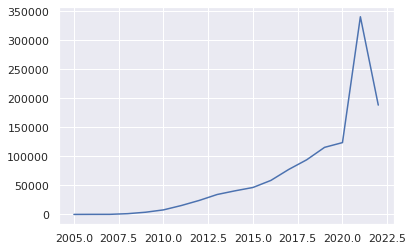

In [14]:
plt.plot(vals,counts)
plt.show()

## 1.2 Numeric Fields

### 3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value). [5]


In [15]:
## Function that will convert a string to a float by removing any additional commas
def StringToFloat(value):
    
    if(type(value)!= float):
        return float(value.replace(",",""))
    
    return value

In [16]:
# Apply the function to appropriate columns
data["gallons"] = data["gallons"].apply(StringToFloat)
data["miles"] = data["miles"].apply(StringToFloat)
data["odometer"] = data["odometer"].apply(StringToFloat)
data["mpg"] = data["mpg"].apply(StringToFloat)

In [17]:
data["gallons"].astype(float)
data["miles"].astype(float)
data["odometer"].astype(float)
data["mpg"].astype(float)

0           NaN
1          31.6
2          28.5
3          46.8
4          21.0
           ... 
1174122    25.7
1174123    20.0
1174124    28.5
1174125    36.5
1174126     0.0
Name: mpg, Length: 1174127, dtype: float64

### 1. Identify what percentage of gallons, miles, odometer and entries are missing. [3]

In [18]:
def findNullAndZeroIndices(data,column):
    d = data[column].to_numpy()
    indices1 = np.where(data[column].isnull()==True)
    indices2 = np.where(d==0)
    allIndices = list(set(indices1[0])| set(indices2[0]))
    return allIndices

In [19]:
# null_Gallons_indices = np.where(data["gallons"].isnull() == True)
# null_miles_indices = np.where(data["miles"].isnull() == True)
# null_odometer_indices = np.where(data["odometer"].isnull() == True)

null_Gallons_indices = findNullAndZeroIndices(data,"gallons")
null_miles_indices = findNullAndZeroIndices(data,"miles")
null_odometer_indices = findNullAndZeroIndices(data,"odometer")
null_mpg_indices = findNullAndZeroIndices(data,"mpg")

In [20]:
n = len(data["gallons"])

percentage_missing_gallons = (len(null_Gallons_indices)/n)*100
percentage_missing_miles = (len(null_miles_indices)/n)*100
percentage_missing_odometer = (len(null_odometer_indices)/n)*100
percentage_missing_mpg = (len(null_mpg_indices)/n)*100

print(f'The percentage of missing values in Gallons is {percentage_missing_gallons} %')
print(f'The percentage of missing values in Miles is {percentage_missing_miles} %')
print(f'The percentage of missing values in Odometer is {percentage_missing_odometer} %')
print(f'The percentage of missing values in MPG is {percentage_missing_mpg} %')

The percentage of missing values in Gallons is 6.365495385081853 %
The percentage of missing values in Miles is 87.56114117127024 %
The percentage of missing values in Odometer is 12.68499915256186 %
The percentage of missing values in MPG is 18.159279192114653 %


### 2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it. [3]

In [21]:
null_mpg_indices = findNullAndZeroIndices(data,"mpg")

So now we are going to find , any indices that are missing 2 or all 3 values. ie an entry that doesn't have mpg,miles and gallons or an entry that is missing any combination of the two.

In [22]:
## Computing indices that are missing all 3 values and 2 values
## These values we wont be able to compute
indices_missing_2_values = ( set(null_Gallons_indices) & set(null_miles_indices)) | ( set(null_Gallons_indices) & set(null_mpg_indices)) |( set(null_mpg_indices) & set(null_miles_indices))
indices_missing_3_values = set(null_Gallons_indices) & set(null_miles_indices) & set(null_mpg_indices) 

In [23]:
indices_to_be_dropped = set(indices_missing_2_values) | set(indices_missing_3_values)

In [24]:
data.drop(indices_to_be_dropped,axis=0,inplace=True)
data = data.reset_index(drop=True)

We now dropped all indices that could not be calculated. So now we can find all indices that can be calculated

In [25]:
updated_null_mpg = findNullAndZeroIndices(data,"mpg")
updated_null_gallons = findNullAndZeroIndices(data,"gallons")
updated_null_miles = findNullAndZeroIndices(data,"miles")

print(len(updated_null_gallons))
print(len(updated_null_miles))
print(len(updated_null_mpg))

0
819168
4312


We can see that gallons and miles still have null and 0 values but we they can be calculated

In [26]:
def calculate_missing_values(mpg = 0, miles = 0, gallons = 0):
    if((mpg == 0 or np.isnan(mpg)) and miles!=0 and gallons!=0):
        return miles/gallons
    if((miles == 0 or np.isnan(miles))and mpg!=0 and gallons!=0):
        return mpg*gallons
    if((gallons == 0 or np.isnan(gallons)) and miles!=0 and mpg!=0):
        return miles/mpg
    
    return np.nan

In [27]:
def Fill_In_Missing_Values(data,indicesOfMissingValues,columnToCalculate):
    n = len(indicesOfMissingValues)

    calculated = []
    for i in range(n):
        row = data.iloc[indicesOfMissingValues[i]]
        calculated.append(calculate_missing_values(row["mpg"],row["miles"],row["gallons"]))

    
    d = data[columnToCalculate].to_numpy()
    d[indicesOfMissingValues] = calculated
    data[columnToCalculate] = d
    data[columnToCalculate].astype(float)


In [28]:
Fill_In_Missing_Values(data,updated_null_miles,"miles")
Fill_In_Missing_Values(data,updated_null_gallons,"gallons")
Fill_In_Missing_Values(data,updated_null_mpg,"mpg")

### 5. Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense? [3]

In [29]:
data.describe()

,odometer,gallons,mpg,miles
count,8.191640e+05,965213.000000,965213.000000,965213.000000
mean,1.010940e+05,12.852886,26.934351,307.064443
std,7.508279e+04,28.927008,605.009620,767.336475
min,1.000000e+00,0.001000,0.018929,0.100000
25%,4.371200e+04,9.476000,18.200000,219.309600
50%,8.914200e+04,12.258000,23.300000,283.946600
75%,1.448470e+05,15.111000,29.800000,355.419100
max,9.180140e+06,19465.309000,559860.946746,195321.200000


### 4. Plot the distributions and comment on the distributions. [3]

In [30]:
mpg = data["mpg"].to_numpy()
gallons = data["gallons"].to_numpy()
miles = data["miles"].to_numpy()

# 2. Feature Engineering

## 1. Create a new column with the currency. (Something to keep in mind is that the Swiss Franc has a period in the abbreviation). [2]

In [77]:
datacopy=data.copy()
datacopy.dtypes

date_fueled         object
date_captured       object
odometer           float64
gallons            float64
cost_per_gallon     object
total_spent         object
mpg                float64
miles              float64
user_url            object
dtype: object

In [78]:
def GetCurrencies(col):
    Column=col.to_numpy()
    Currencies=[]
    for i in range(len(Column)):
        Price=Column[i]
        Currency=""
        for k in range(len(Price)):
            if Price[k].isdigit():
                break
            else:
                Currency=Currency+Price[k]
        Currencies.append(Currency)
    return Currencies

In [79]:
Currs=GetCurrencies(datacopy['total_spent'])
datacopy.insert(datacopy.shape[1],"Currency",Currs,allow_duplicates=True)

## 2. Create a new column containing the float value of the total spend and the cost per gallon. (Swiss Franc comment as above). [2]

In [80]:
def isfloat(str):
    try:
        float(str)
        return True
    except:
        return False

In [96]:
def GetFloatColumn(col):
    Column=col.to_numpy()
    print(len(Column))
    nulls = np.where(col.isnull()==True)
    for i in range(len(Column)):
        Price=Column[i]
        if isfloat(Price):
            continue
        else:
            for k in range(len(Price)):
                if isfloat(Price[k:]):
                    Column[i]=Price[k:]
                    break
    return Column

In [97]:
print(datacopy['cost_per_gallon'])

test
0         $5.599
1          £5.45
2          £5.11
3         $3.029
4         $3.739
           ...  
965208    $3.099
965209    $1.999
965210    $2.449
965211    $3.449
965212    $3.539
Name: cost_per_gallon, Length: 965213, dtype: object


In [100]:
datacopy['cost_per_gallon']=GetFloatColumn(datacopy['cost_per_gallon']).astype(float)

965213


In [101]:
print(datacopy['cost_per_gallon'])
datacopy.dtypes

0         5.599
1         5.450
2         5.110
3         3.029
4         3.739
          ...  
965208    3.099
965209    1.999
965210    2.449
965211    3.449
965212    3.539
Name: cost_per_gallon, Length: 965213, dtype: float64


date_fueled         object
date_captured       object
odometer           float64
gallons            float64
cost_per_gallon    float64
total_spent         object
mpg                float64
miles              float64
user_url            object
Currency            object
dtype: object

In [102]:
print(datacopy['total_spent'])

0         $67.86
1         £43.53
2         £54.00
3         $35.29
4         $12.76
           ...  
965208    $37.95
965209    $26.08
965210    $30.95
965211    $34.50
965212    $37.13
Name: total_spent, Length: 965213, dtype: object


In [103]:
datacopy['total_spent']=GetFloatColumn(datacopy['total_spent']).astype(float)

965213


In [104]:
print(datacopy['total_spent'])

0         67.86
1         43.53
2         54.00
3         35.29
4         12.76
          ...  
965208    37.95
965209    26.08
965210    30.95
965211    34.50
965212    37.13
Name: total_spent, Length: 965213, dtype: float64


In [105]:
datacopy.dtypes

date_fueled         object
date_captured       object
odometer           float64
gallons            float64
cost_per_gallon    float64
total_spent        float64
mpg                float64
miles              float64
user_url            object
Currency            object
dtype: object

## 3. Car make, model, year, User ID: use the url (the last value in the URL is the user ID) [4]

In [126]:
print(datacopy['user_url'][965212])

https://www.somewebsite.com/mini/cooper/2019/952426


In [119]:
def SplitURL(URL):
    split=URL.split("/")
    UserID=split[len(split)-1]
    Year=split[len(split)-2]
    Model=split[len(split)-3]
    Make=split[len(split)-4]
    return Make,Model,Year,UserID

In [120]:
url="https://www.somewebsite.com/bmw/320d/2010/247233"
d=SplitURL(url)
print(d)

('bmw', '320d', '2010', '247233')


In [121]:
def GetCarColumns(col):
    Column=col.to_numpy()
    Car=[]
    Model=[]
    Year=[]
    UserID=[]
    for k in range(len(Column)):
        CarMake, CarModel, CarYear, UID= SplitURL(Column[k])
        Car.append(CarMake)
        Model.append(CarModel)
        Year.append(CarYear)
        UserID.append(UID)
    return Car, Model, Year, UserID


In [122]:
car_make, car_model, car_year, UserID = GetCarColumns(datacopy['user_url']) 

In [123]:
datacopy.insert(datacopy.shape[1],"car_make",car_make,allow_duplicates=True)
datacopy.insert(datacopy.shape[1],"car_model",car_model,allow_duplicates=True)
datacopy.insert(datacopy.shape[1],"car_year",car_year,allow_duplicates=True)
datacopy.insert(datacopy.shape[1],"UserID",UserID,allow_duplicates=True)

In [124]:
print(datacopy)

       date_fueled date_captured  odometer  gallons  cost_per_gallon  \
0       2012-11-07   Aug 30 2016   11983.0   12.120            5.599   
1       2012-09-22   Sep 28 2012   98233.0    7.991            5.450   
2       2019-05-04    May 4 2019  163802.0   10.575            5.110   
3       2022-02-15   Feb 15 2022       NaN   11.651            3.029   
4       2021-10-23   Oct 23 2021  147567.0    3.413            3.739   
...            ...           ...       ...      ...              ...   
965208  2016-10-20   Oct 20 2016    9965.0   12.245            3.099   
965209  2020-02-19   Feb 19 2020  118237.0   13.046            1.999   
965210  2019-12-06    Dec 6 2019  141761.0   12.637            2.449   
965211  2021-10-04    Oct 4 2021   65029.0   10.002            3.449   
965212  2021-07-26   Jul 26 2021   15255.0   10.493            3.539   

        total_spent   mpg     miles  \
0             67.86  31.6  382.9920   
1             43.53  28.5  227.7435   
2             54.0

## The data is given in imperial units, and in SA, we use proper measurement standards.

## 1. litres filled: use the gallons - consider whether to use UK or US gallons. [2]

In [127]:
def ConvertToLitres(volume, currency):
    if currency=='$':
        return volume*3.785
    else:
        return volume*4.546

In [ ]:
def ConvertToKM(distance):
    return distance*1.609

In [ ]:
def GetLitres